**UK RETAIL**



* Domain - E-Commerce
* Type   - Classification
* Target - Churn
* Goal   - Churn prediction(A customer who hasn't made any purchases in the last 90 days )




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving online_retail_modified_2.xlsx to online_retail_modified_2.xlsx


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 import pandas as pd
data = pd.read_excel("online_retail_modified_2.xlsx")



In [ ]:
!pip install openpyxl  # if not already installed


import numpy as np


In [ ]:
df=pd.DataFrame(data)


In [ ]:
import pandas as pd

# Ensure date column is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Get the last date in the dataset
max_date = df['InvoiceDate'].max()

# Define churn cutoff (e.g., 3 months before last date)
churn_threshold = max_date - pd.DateOffset(months=3)

# Find last purchase date per customer
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Mark churn = 1 if last purchase was before the threshold
last_purchase['Churn'] = (last_purchase['InvoiceDate'] < churn_threshold).astype(int)

# Merge churn info back into the original dataframe
df = df.merge(last_purchase[['CustomerID', 'Churn']], on='CustomerID', how='left')

# Optional: Check distribution
print(df['Churn'].value_counts())


Churn
0.0    13478
1.0     3050
Name: count, dtype: int64


In [ ]:
df = df.drop(columns=['Description'])


In [ ]:
df.head()        # See the first few rows
df.info()        # Overview of data types and missing values
df.describe()    # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21909 entries, 0 to 21908
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     21909 non-null  object        
 1   StockCode     21909 non-null  object        
 2   Quantity      21909 non-null  int64         
 3   InvoiceDate   21909 non-null  datetime64[ns]
 4   UnitPrice     21909 non-null  float64       
 5   CustomerID    16528 non-null  float64       
 6   Country       21909 non-null  object        
 7   TotalPrice    21909 non-null  float64       
 8   InvoiceMonth  21909 non-null  int64         
 9   InvoiceDay    21909 non-null  int64         
 10  InvoiceHour   21909 non-null  int64         
 11  Weekday       21909 non-null  object        
 12  Is_Return     21909 non-null  bool          
 13  Is_UK         21909 non-null  bool          
 14  Churn         16528 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour,Churn
count,21909.000000,21909,21909.000000,16528.000000,21909.000000,21909.000000,21909.000000,21909.000000,16528.000000
mean,9.315624,2011-07-04 02:20:08.295220992,4.986858,15279.943187,16.818228,7.537679,15.031403,13.069606,0.184535
min,-2003.000000,2010-12-01 08:34:00,0.000000,12347.000000,-5575.280000,1.000000,1.000000,6.000000,0.000000
25%,1.000000,2011-03-25 15:50:00,1.250000,13924.000000,3.320000,5.000000,7.000000,11.000000,0.000000
50%,3.000000,2011-07-20 11:22:00,2.080000,15147.500000,9.360000,8.000000,15.000000,13.000000,0.000000
75%,11.000000,2011-10-18 16:58:00,4.130000,16790.000000,17.400000,11.000000,22.000000,15.000000,0.000000
max,1300.000000,2011-12-09 12:31:00,5575.280000,18287.000000,2868.000000,12.000000,31.000000,20.000000,1.000000
std,37.626963,NaN,67.012753,1710.761414,83.444659,3.515765,8.615613,2.436437,0.387932


In [ ]:
# Check missing values
df.isnull().sum()



,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,5381
Country,0
TotalPrice,0
InvoiceMonth,0
InvoiceDay,0


In [ ]:
# Fill missing CustomerID with -1 (as a placeholder)
df['CustomerID'].fillna(-1, inplace=True)


<ipython-input-10-3166054524>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(-1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21909 entries, 0 to 21908
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     21909 non-null  object        
 1   StockCode     21909 non-null  object        
 2   Quantity      21909 non-null  int64         
 3   InvoiceDate   21909 non-null  datetime64[ns]
 4   UnitPrice     21909 non-null  float64       
 5   CustomerID    21909 non-null  float64       
 6   Country       21909 non-null  object        
 7   TotalPrice    21909 non-null  float64       
 8   InvoiceMonth  21909 non-null  int64         
 9   InvoiceDay    21909 non-null  int64         
 10  InvoiceHour   21909 non-null  int64         
 11  Weekday       21909 non-null  object        
 12  Is_Return     21909 non-null  bool          
 13  Is_UK         21909 non-null  bool          
 14  Churn         16528 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
InvoiceMonth,0
InvoiceDay,0


In [ ]:
#Checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
 #for finding outlayers
 #assigning numerical columns to a variable
num_columns = df.select_dtypes(include='number')
num_columns


,Quantity,UnitPrice,CustomerID,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour,Churn
0,8,3.75,13047.0,30.00,12,1,8,1.0
1,3,4.95,13047.0,14.85,12,1,8,1.0
2,24,1.25,12583.0,30.00,12,1,8,0.0
3,24,1.95,12583.0,46.80,12,1,8,0.0
4,24,0.42,12583.0,10.08,12,1,8,0.0
...,...,...,...,...,...,...,...,...
21904,12,1.25,12713.0,15.00,12,9,12,0.0
21905,10,1.79,17581.0,17.90,12,9,12,0.0
21906,1,1.65,12748.0,1.65,12,9,12,0.0
21907,1,1.25,12748.0,1.25,12,9,12,0.0


<Axes: >

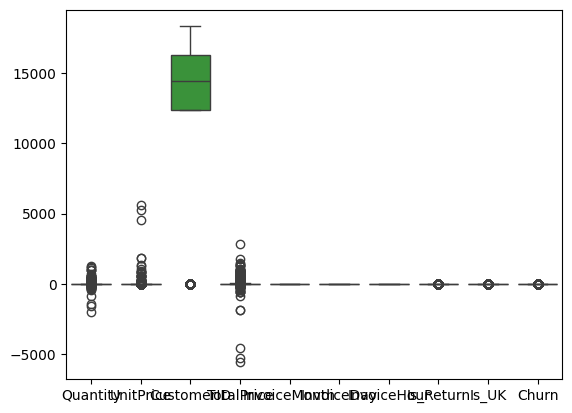

In [ ]:
#detecting outlayers
sns.boxplot(data=df)

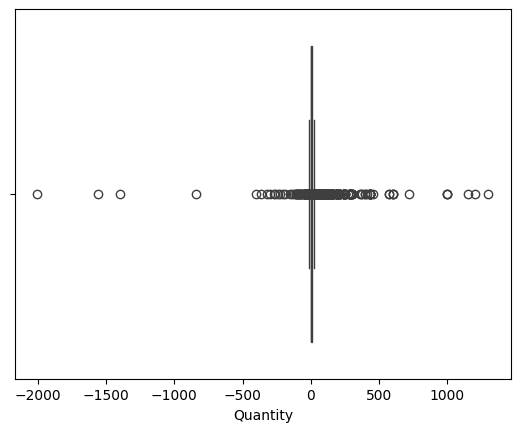

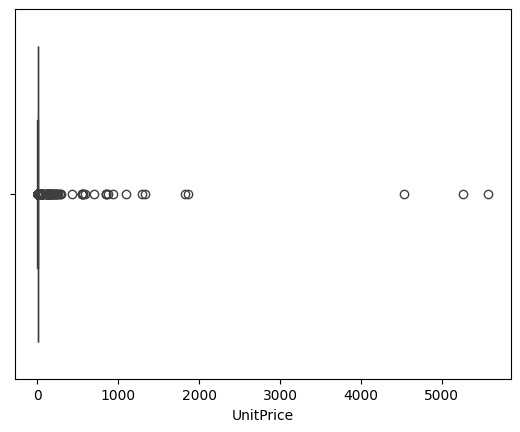

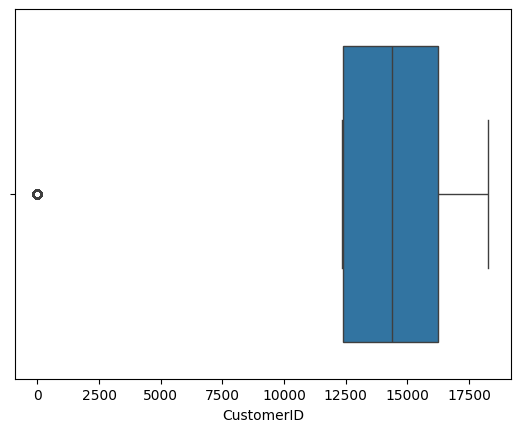

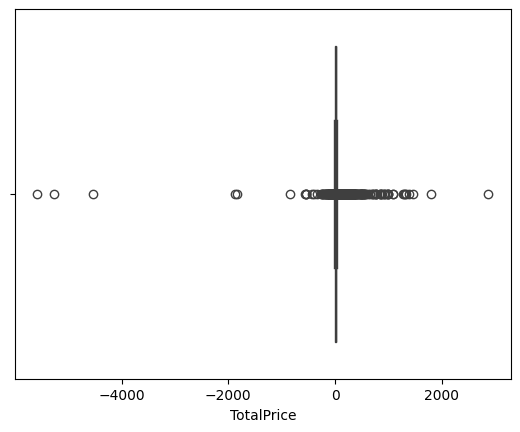

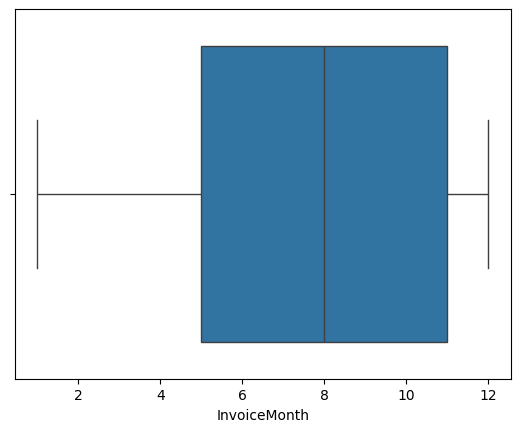

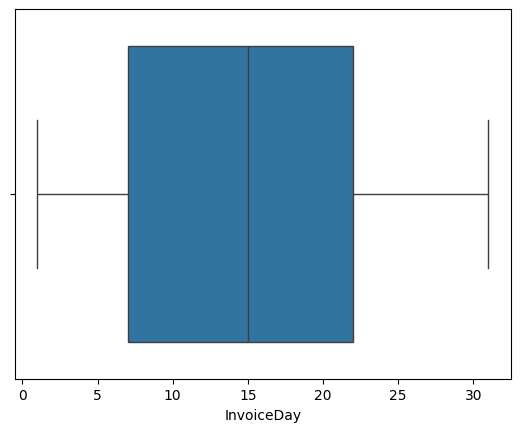

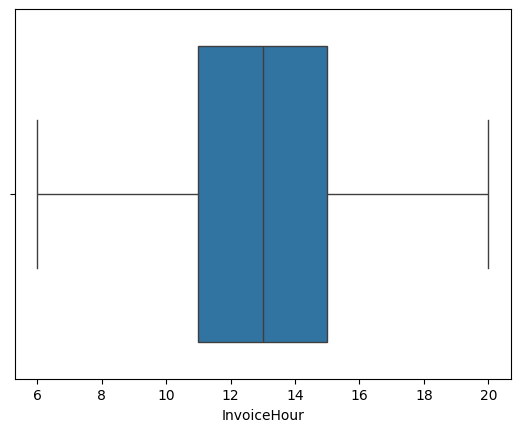

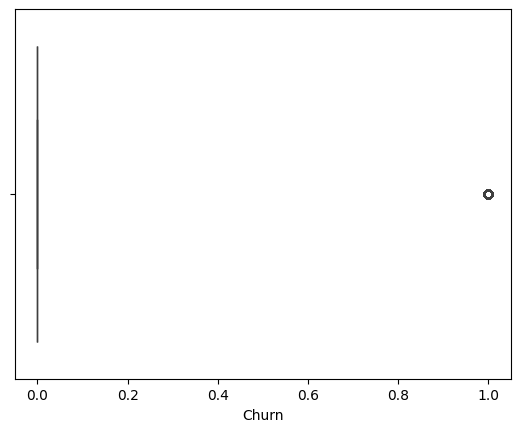

In [ ]:
#to view outlayers for each columns
for i in num_columns.columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
#iqr method
def outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
       #Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
       #Define lower and upper bounds for non-outliers
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        #Cap the values beyond the IQR limits
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df



In [ ]:
df1=outliers(df)

<Axes: >

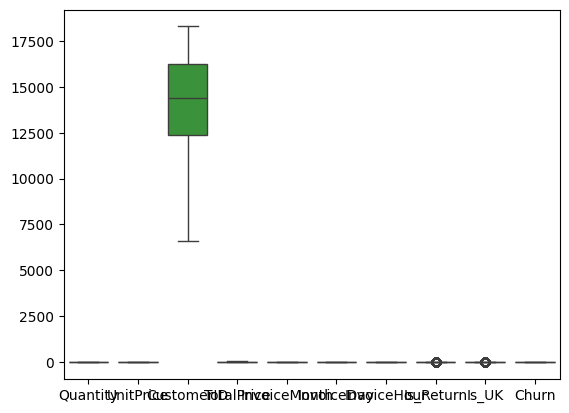

In [ ]:
sns.boxplot(data=df1)

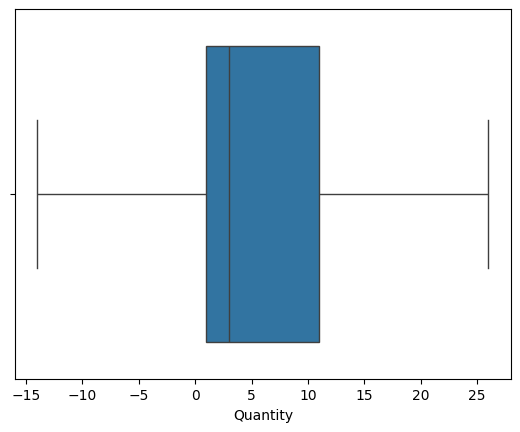

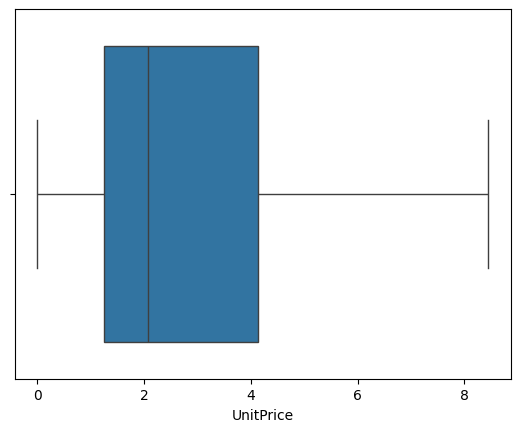

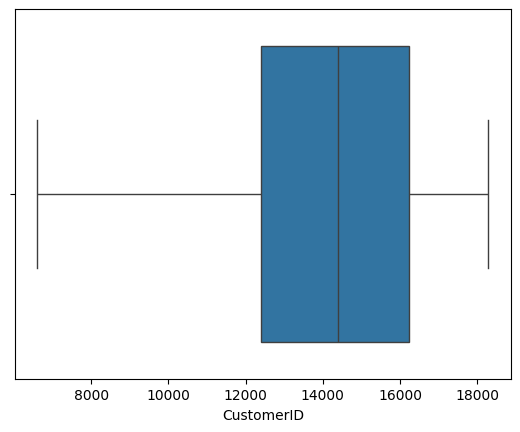

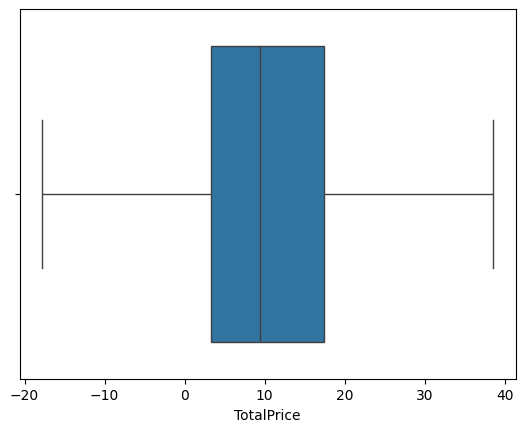

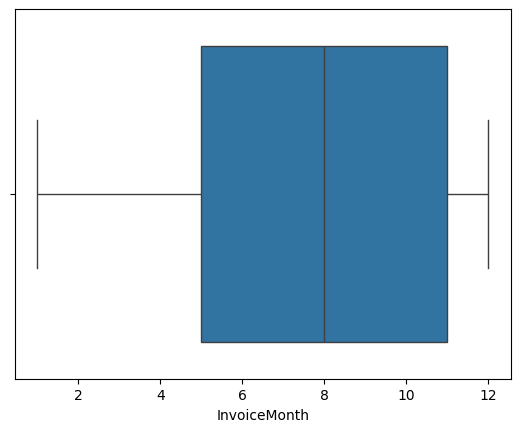

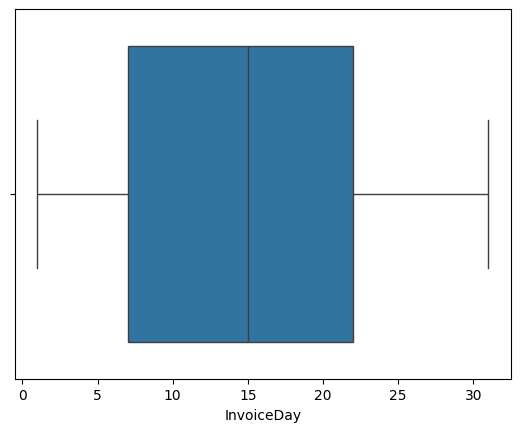

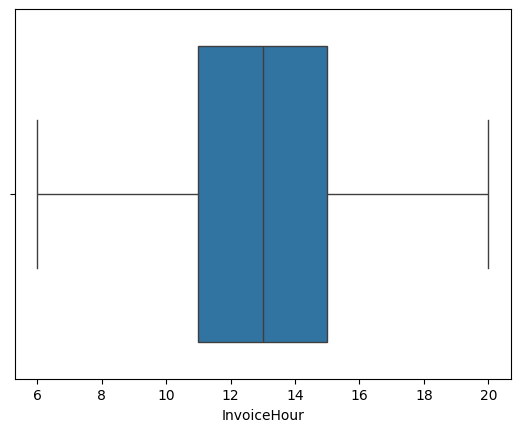

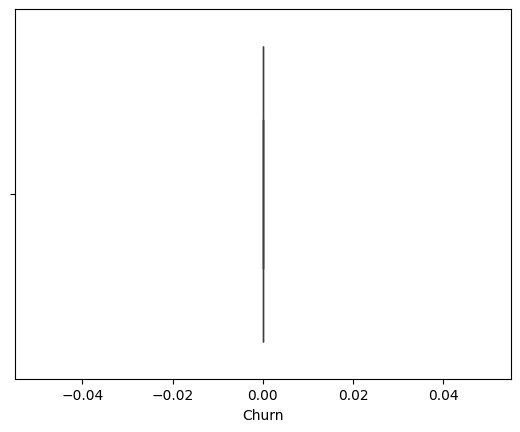

In [ ]:
# Loop through each numerical column and plot a boxplot
for i in num_columns.columns:
  plt.figure(figsize=(8, 4))
  sns.boxplot(data=df1,x=i)
  plt.show()

In [ ]:
#to make yes or no to numerical values
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Initialize LabelEncoder to convert categorical labels into numeric form
le=LabelEncoder()

In [ ]:
#Encode the 'Churn' column: converts values like 'Yes'/'No' into 1/0
df1['Churn']=le.fit_transform(df1['Churn'])

In [ ]:
# Encode 'Is_Return' column to numerical values
df1['Is_Return']=le.fit_transform(df1['Is_Return'])

In [ ]:
# Encode 'Is_UK' column
df1['Is_UK']=le.fit_transform(df1['Is_UK'])

In [ ]:
df1.head(5)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour,Weekday,Is_Return,Is_UK,Churn
0,536367,22749,8.0,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,30.00,12,1,8,Wednesday,0,1,0
1,536367,22623,3.0,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,12,1,8,Wednesday,0,1,0
2,536370,21791,24.0,2010-12-01 08:45:00,1.25,12583.0,France,30.00,12,1,8,Wednesday,0,0,0
3,536370,22659,24.0,2010-12-01 08:45:00,1.95,12583.0,France,38.52,12,1,8,Wednesday,0,0,0
4,536370,22540,24.0,2010-12-01 08:45:00,0.42,12583.0,France,10.08,12,1,8,Wednesday,0,0,0


In [ ]:
#converting country into numerical
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])  # example


In [ ]:
print(le.classes_[32])

United Kingdom


In [ ]:
#converting weekday into numerical
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['Weekday'] = df['Weekday'].map(weekday_map)


In [ ]:
df1.head(5)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour,Weekday,Is_Return,Is_UK,Churn
0,536367,22749,8.0,2010-12-01 08:34:00,3.75,13047.0,32,30.00,12,1,8,2,0,1,0
1,536367,22623,3.0,2010-12-01 08:34:00,4.95,13047.0,32,14.85,12,1,8,2,0,1,0
2,536370,21791,24.0,2010-12-01 08:45:00,1.25,12583.0,11,30.00,12,1,8,2,0,0,0
3,536370,22659,24.0,2010-12-01 08:45:00,1.95,12583.0,11,38.52,12,1,8,2,0,0,0
4,536370,22540,24.0,2010-12-01 08:45:00,0.42,12583.0,11,10.08,12,1,8,2,0,0,0


In [ ]:
#Checking skewness
X=df1.drop('Churn',axis=1)
Y=df1['Churn']

In [ ]:
# Only real numeric columns
X = df.select_dtypes(include=['float64', 'int64'])
print(X.skew())


Quantity        1.276083
UnitPrice       1.141204
CustomerID     -0.728186
Country        -3.520406
TotalPrice      0.891200
InvoiceMonth   -0.411202
InvoiceDay      0.146809
InvoiceHour     0.006097
Weekday         0.462172
Is_Return       6.627434
Is_UK          -2.908026
Churn           1.181445
dtype: float64


In [ ]:
from sklearn.preprocessing import PowerTransformer


In [ ]:
pt=PowerTransformer('yeo-johnson')

In [ ]:
numerical_col = df1.select_dtypes(include='number').columns

In [ ]:
df1[numerical_col]=pt.fit_transform(df1[numerical_col])

print(df1[numerical_col].skew())

Quantity       -0.064831
UnitPrice       0.041745
CustomerID     -0.392615
Country        -2.955402
TotalPrice      0.225025
InvoiceMonth   -0.310362
InvoiceDay     -0.162814
InvoiceHour    -0.035595
Weekday        -0.084209
Is_Return       6.627434
Is_UK          -2.908026
Churn           1.181445
dtype: float64


In [ ]:
#removing churn from the data X
X = df.select_dtypes(include=['number']).copy()
X = X.drop(columns=['CustomerID', 'Churn'], errors='ignore')


In [ ]:
numerical_col = X.columns


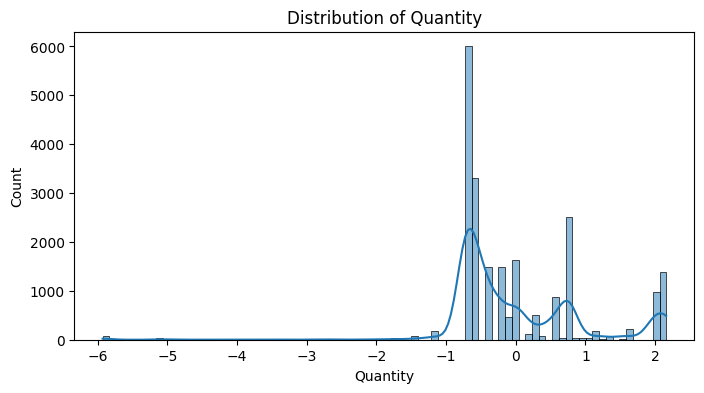

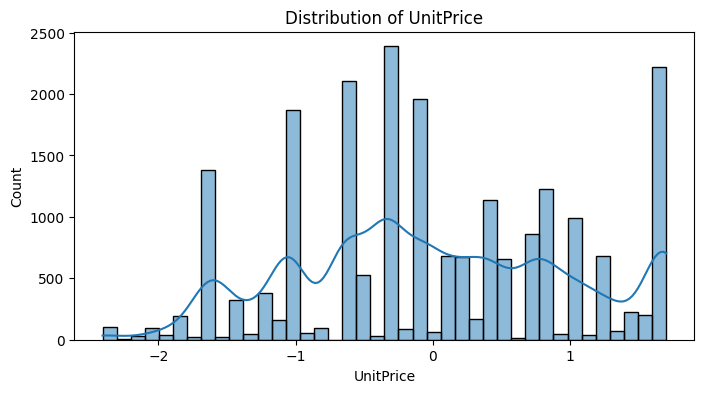

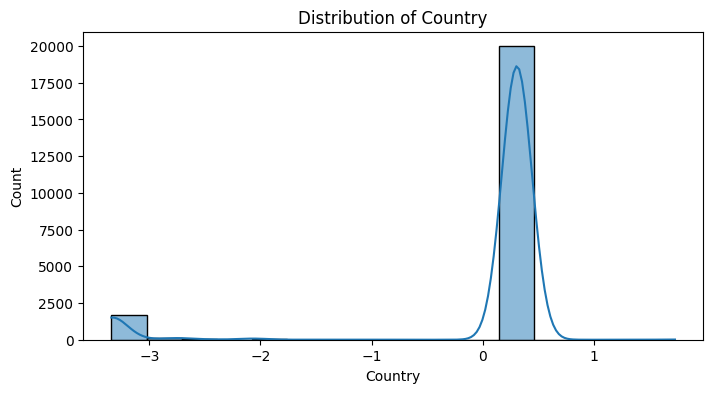

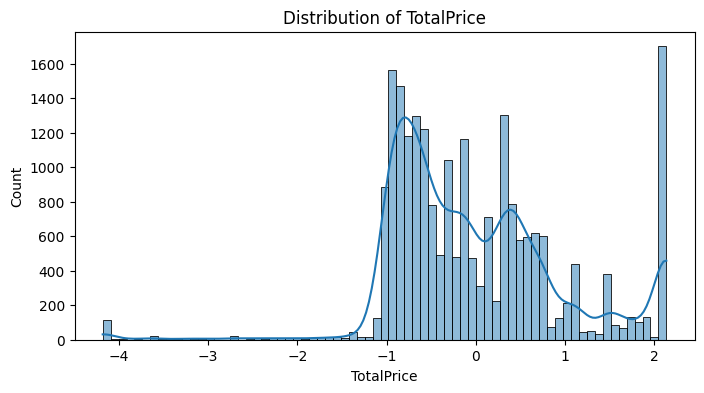

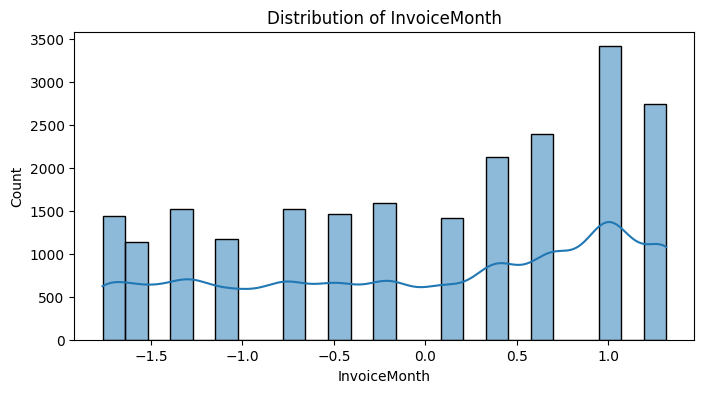

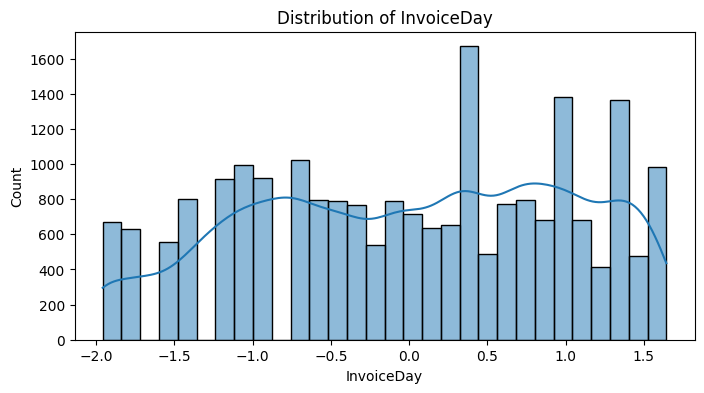

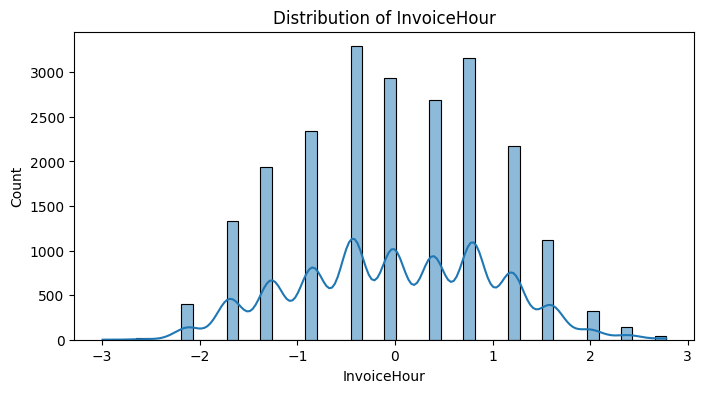

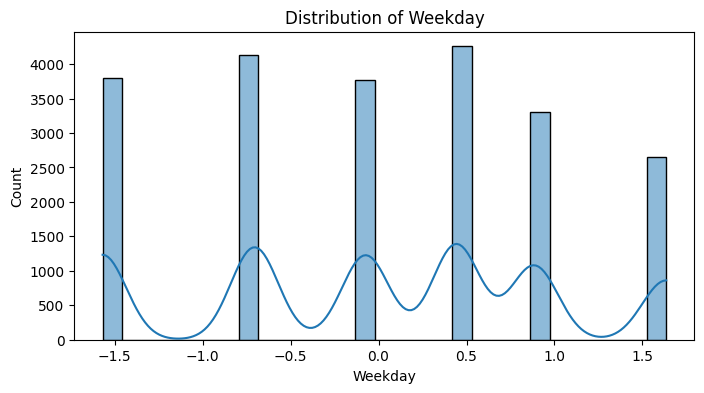

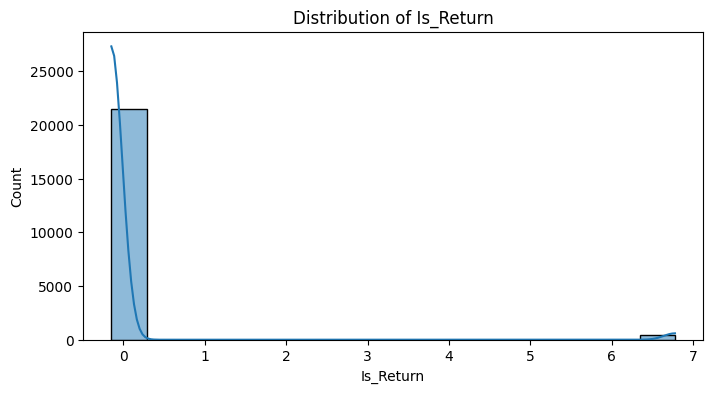

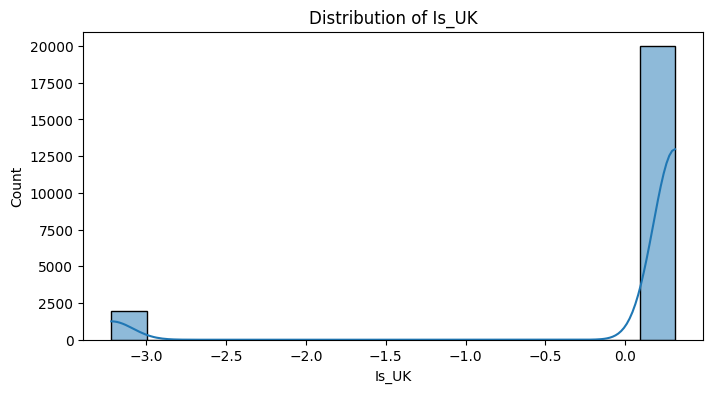

In [ ]:
#Loop through each numerical column to plot its distribution
for i in numerical_col:
  plt.figure(figsize=(8, 4))#adjust size for better readability
  sns.histplot(data=X,x=i,kde=True)#kde adds a smooth curve
  plt.title(f"Distribution of {i}")
  plt.show()

In [ ]:
 #Display the correlation matrix
cor = df1.select_dtypes(include=['number']).corr()
print(cor)


              Quantity  UnitPrice  CustomerID   Country  TotalPrice  \
Quantity      1.000000  -0.363616    0.210588 -0.182561    0.640752   
UnitPrice    -0.363616   1.000000   -0.172528  0.007925    0.237670   
CustomerID    0.210588  -0.172528    1.000000  0.061270    0.099484   
Country      -0.182561   0.007925    0.061270  1.000000   -0.198945   
TotalPrice    0.640752   0.237670    0.099484 -0.198945    1.000000   
InvoiceMonth -0.009841  -0.012786    0.020059  0.010818   -0.011018   
InvoiceDay    0.012463  -0.011962    0.007526 -0.000039    0.001772   
InvoiceHour  -0.173708   0.033359   -0.201678  0.134576   -0.174808   
Weekday       0.004924  -0.038169    0.135634 -0.007051   -0.007650   
Is_Return    -0.373884   0.006009    0.008000 -0.021745   -0.378992   
Is_UK        -0.181936   0.008427    0.064244  0.986616   -0.198026   
Churn        -0.299252   0.194487   -0.870370  0.156610   -0.179161   

              InvoiceMonth  InvoiceDay  InvoiceHour   Weekday  Is_Return  \


<Axes: >

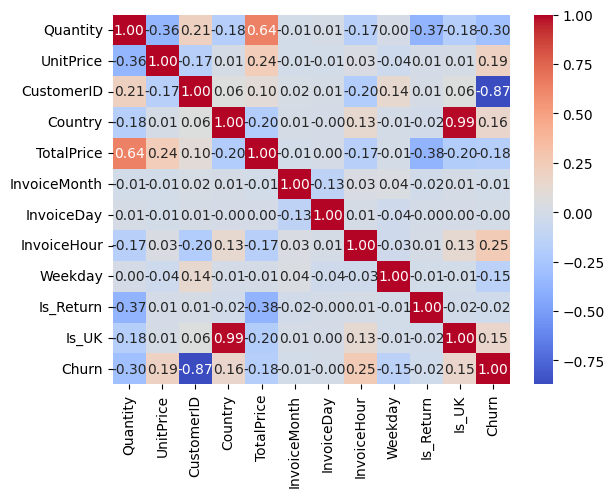

In [ ]:
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f')


<ipython-input-47-3900127396>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


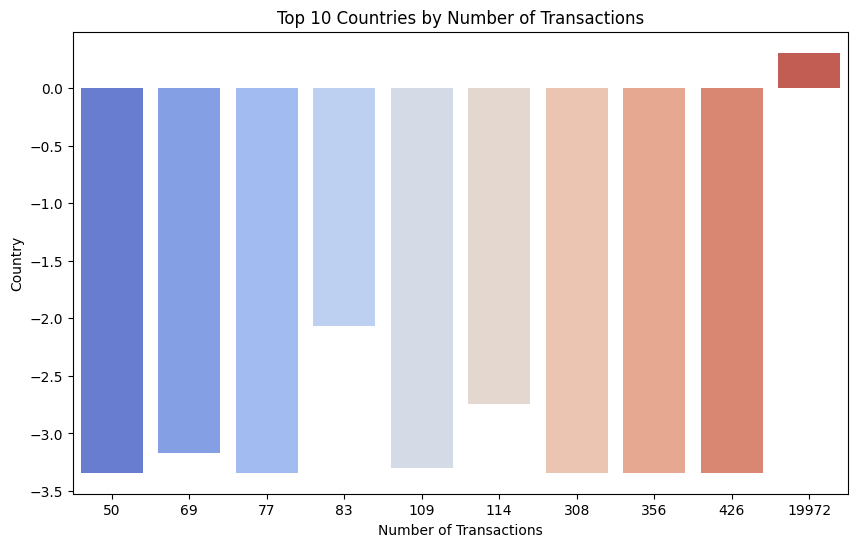

In [ ]:
#Top 10 countries by number of transactions
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()


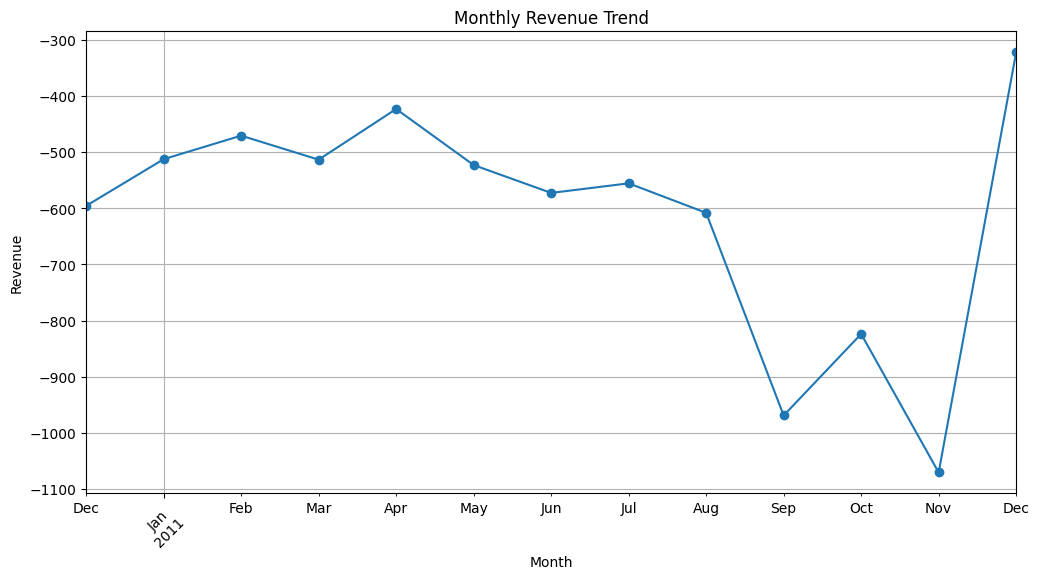

In [ ]:
#Monthly revenue trend
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#feature selection
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
sk=SelectKBest(score_func= f_classif)

In [ ]:
k_best =sk.fit_transform(X,Y)

In [ ]:
selected_features =X.columns[sk.get_support()]

In [ ]:
selected_features

Index(['Quantity', 'UnitPrice', 'Country', 'TotalPrice', 'InvoiceMonth',
       'InvoiceDay', 'InvoiceHour', 'Weekday', 'Is_Return', 'Is_UK'],
      dtype='object')

In [ ]:
#Create a DataFrame to display feature importance scores from SelectKBest
feature_score = pd.DataFrame({'Feature': X.columns, 'Score': sk.scores_}).sort_values(by='Score',ascending=False)

In [ ]:
feature_score

,Feature,Score
0,Quantity,2153.887284
6,InvoiceHour,1519.648681
1,UnitPrice,860.853858
3,TotalPrice,726.203107
2,Country,550.589449
9,Is_UK,538.125252
7,Weekday,533.656521
8,Is_Return,13.450708
4,InvoiceMonth,3.436009
5,InvoiceDay,0.324791


In [ ]:
X_selected=X[selected_features]
X_selected.columns

Index(['Quantity', 'UnitPrice', 'Country', 'TotalPrice', 'InvoiceMonth',
       'InvoiceDay', 'InvoiceHour', 'Weekday', 'Is_Return', 'Is_UK'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
sc=StandardScaler()

In [ ]:
X_scaled=sc.fit_transform(X_selected)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#converting all models into dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [ ]:
#fitting and training the data
results={}
for model_name, model in models.items():
  #training
    model.fit(X_train, Y_train)
  #predicting
    Y_pred = model.predict(X_test)
  #accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
   #confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
  #classification report
    cr = classification_report(Y_test, Y_pred)
 #store results in dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': cr
    }


In [ ]:
#print the result
for model_name, metrics in results.items():
    print(f"\n{model_name}Results")
    print(f"\nAccuracy: {metrics['Accuracy']:4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic RegressionResults

Accuracy: 0.794521
Confusion Matrix:
[[3105  195]
 [ 705  375]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3300
           1       0.66      0.35      0.45      1080

    accuracy                           0.79      4380
   macro avg       0.74      0.64      0.66      4380
weighted avg       0.78      0.79      0.77      4380


SVMResults

Accuracy: 0.851370
Confusion Matrix:
[[3098  202]
 [ 449  631]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3300
           1       0.76      0.58      0.66      1080

    accuracy                           0.85      4380
   macro avg       0.82      0.76      0.78      4380
weighted avg       0.84      0.85      0.84      4380


Random ForestResults

Accuracy: 0.941553
Confusion Matrix:
[[3227   73]
 [ 183  897]]
Classification Report:
              precis

In [ ]:
 from sklearn.pipeline import Pipeline
 from sklearn.impute import SimpleImputer
 import joblib

In [ ]:
#Create a machine learning pipeline
pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier())
])

In [ ]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [ ]:
ypred =pipeline.predict(X_test)

In [ ]:
#saving the model
joblib.dump(pipeline,'model.joblib')

['model.joblib']

In [ ]:
#loading the pipeline model
loaded_pipeline=joblib.load('model.joblib')

In [ ]:
df_model = df_model.dropna(subset=['Churn'])


In [ ]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# STEP 2: Load Data
df = pd.read_excel("online_retail_modified_2.xlsx")

# STEP 3: Preprocess
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = df['InvoiceDate'].max()
churn_threshold = max_date - pd.DateOffset(months=3)

# Create churn labels
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase['Churn'] = (last_purchase['InvoiceDate'] < churn_threshold).astype(int)
df = df.merge(last_purchase[['CustomerID', 'Churn']], on='CustomerID', how='left')

# Drop unnecessary columns
df.drop(columns=['Description'], inplace=True)
df['CustomerID'].fillna(-1, inplace=True)
df.drop_duplicates(inplace=True)

# STEP 4: Use only numeric columns
df_model = df.select_dtypes(include='number')

# ✅ DROP ROWS with missing Churn
df_model = df_model.dropna(subset=['Churn'])

# STEP 5: Separate features and target
X = df_model.drop(columns='Churn')
y = df_model['Churn']





<ipython-input-68-0fabc8bce0f6>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(-1, inplace=True)


In [ ]:
# STEP 6: Take 1 random row as "unseen"
unseen = X.sample(n=1, random_state=42)
X_rest = X.drop(index=unseen.index)
y_rest = y.drop(index=unseen.index)

# STEP 7: Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_rest, y_rest)

# STEP 8: Predict churn for unseen data
prediction = model.predict(unseen)
proba = model.predict_proba(unseen)[:, 1]

# STEP 9: Display results
result = unseen.copy()
result['Predicted_Churn'] = prediction
result['Churn_Probability'] = proba
print(result)



     Quantity  UnitPrice  CustomerID  TotalPrice  InvoiceMonth  InvoiceDay  \
448         2       1.65     15860.0         3.3            12           6   

     InvoiceHour  Predicted_Churn  Churn_Probability  
448           11              0.0               0.12  


**CONCLUSION**

After comparing all models, the Random Forest Classifier achieved the highest accuracy among them.

